## Notes on Chapter 2

* Variable distribution: what variables there are and how many times each shows up; frequency of each value
* histogram = graph that shows variable distribution (complete description of disstribution of a sample); can be used to recreate values in a sample
* normal distribution is bell-shaped; also called Gaussian
* tail = distribution extension (makes the bell asymmetric)
* outliers might be inaccuracies but also might be true reports of rare cases
* domain knowledge = knowledge specific to the data set you're working with
* central tendency: values cluster around a point (mean)
* modes: values of clusters
* spread: value variability
* summary statistics answer questions about aforementioned keywords
* most common summary stat is the mean
* mean = summary stat computed w/ sum formula; average = summary stat that can be used to describe central tendency
* variance = summary stat that describes variability/spread of a distribution; mean times deviation squared
* since variance is S^2, the sqrt of variance is S; also known as standard deviation
* with an S of 2.7 weeks, we can expect to commonly see deviations of 2-3 weeks from the mean
* effect size summarizes size of effect
* if standard deviation = 2.7 and diff. between first babies & others = 0.078 weeks, then the difference is 0.029 standard deviations

## Notes on TEDx & blog post

#### Big data in the service of humanity
* When you think about it, it's *really* cool that with just a set of data, Google can provide us with things like Google Maps.
* Snaps to the idea that data should be used for social good!
* I totally get what he's talking about with the hackathon vignette. I was lucky, my first hackathon was HackingArts.
* Really great analogy to explain why data.gov was in danger
* I think I like DataKind

#### First Babies Are More Likely To Be Late
* 18,000 pregnancies did not result in a live birth...
* When the graph levels off, we enter a "memory-less system"
* [Description](http://www2.hawaii.edu/~gurdal/EE315/class4.pdf) of memoryless system: output at time _t_ depends only on input at time _t_, not on input at any previous interval (or following)

# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [4]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first

Given a list of values, there are several ways to count the frequency of each value.

In [5]:
t = [1, 2, 2, 3, 5]

You can use a Python dictionary:

In [6]:
hist = {}
for x in t:
    hist[x] = hist.get(x, 0) + 1
    
hist

{1: 1, 2: 2, 3: 1, 5: 1}

You can use a `Counter` (which is a dictionary with additional methods):

In [7]:
from collections import Counter
counter = Counter(t)
counter

Counter({1: 1, 2: 2, 3: 1, 5: 1})

Or you can use the `Hist` object provided by `thinkstats2`:

In [8]:
import thinkstats2
hist = thinkstats2.Hist([1, 2, 2, 3, 5])
hist

Hist({1: 1, 2: 2, 3: 1, 5: 1})

`Hist` provides `Freq`, which looks up the frequency of a value.

In [9]:
hist.Freq(2)

2

You can also use the bracket operator, which does the same thing.

In [10]:
hist[2]

2

If the value does not appear, it has frequency 0.

In [11]:
hist[4]

0

The `Values` method returns the values:

In [12]:
hist.Values()

[1, 2, 3, 5]

So you can iterate the values and their frequencies like this:

In [13]:
for val in sorted(hist.Values()):
    print(val, hist[val])

1 1
2 2
3 1
5 1


Or you can use the `Items` method:

In [14]:
for val, freq in hist.Items():
     print(val, freq)

1 1
2 2
3 1
5 1


`thinkplot` is a wrapper for `matplotlib` that provides functions that work with the objects in `thinkstats2`.

For example `Hist` plots the values and their frequencies as a bar graph.

`Config` takes parameters that label the x and y axes, among other things.

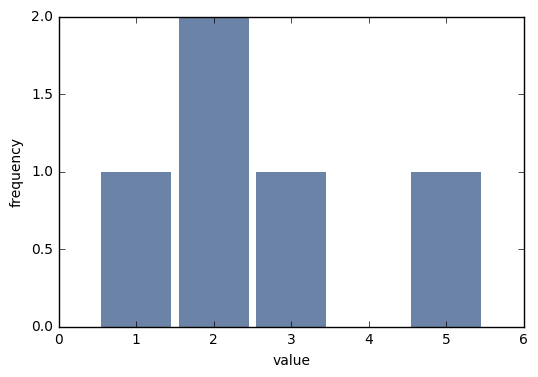

In [15]:
import thinkplot
thinkplot.Hist(hist)
thinkplot.Config(xlabel='value', ylabel='frequency')

As an example, I'll replicate some of the figures from the book.

First, I'll load the data from the pregnancy file and select the records for live births.

In [16]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

Here's the histogram of birth weights in pounds.  Notice that `Hist` works with anything iterable, including a Pandas Series.  The `label` attribute appears in the legend when you plot the `Hist`. 

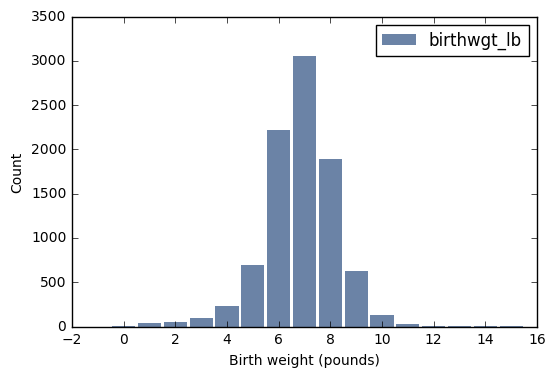

In [17]:
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Count')

Before plotting the ages, I'll apply `floor` to round down:

In [18]:
ages = np.floor(live.agepreg)

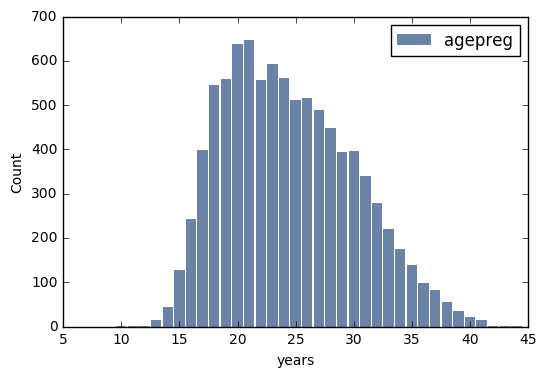

In [19]:
hist = thinkstats2.Hist(ages, label='agepreg')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='years', ylabel='Count')

As an exercise, plot the histogram of pregnancy lengths (column `prglngth`).

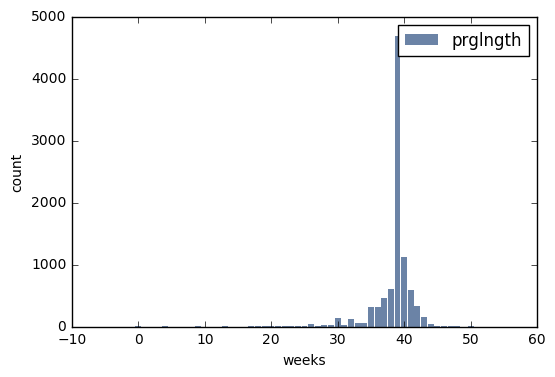

In [20]:
hist = thinkstats2.Hist(live.prglngth, label='prglngth')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='weeks', ylabel='count')

`Hist` provides smallest, which select the lowest values and their frequencies.

In [18]:
for weeks, freq in hist.Smallest(10):
    print(weeks, freq)

10.0 2
11.0 1
12.0 1
13.0 14
14.0 43
15.0 128
16.0 242
17.0 398
18.0 546
19.0 559


Use `Largest` to display the longest pregnancy lengths.

In [21]:
for weeks, freq in hist.Largest(10):
    print(weeks, freq)

50 2
48 7
47 1
46 1
45 10
44 46
43 148
42 328
41 587
40 1116


From live births, we can selection first babies and others using `birthord`, then compute histograms of pregnancy length for the two groups.

In [22]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

first_hist = thinkstats2.Hist(firsts.prglngth, label='first')
other_hist = thinkstats2.Hist(others.prglngth, label='other')

We can use `width` and `align` to plot two histograms side-by-side.

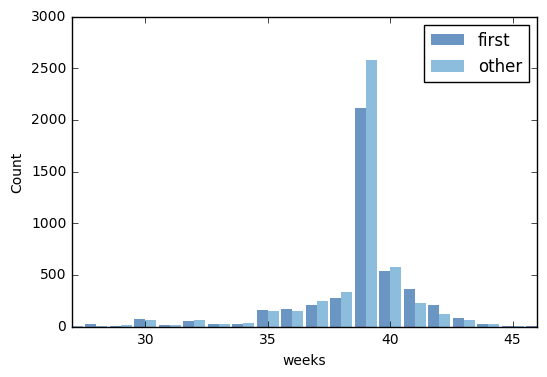

In [23]:
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='weeks', ylabel='Count', xlim=[27, 46])

`Series` provides methods to compute summary statistics:

In [24]:
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()

Here are the mean and standard deviation:

In [25]:
mean, std

(38.56055968517709, 2.702343810070593)

As an exercise, confirm that `std` is the square root of `var`:

In [32]:
print(np.sqrt(var))
np.sqrt(var) == std

2.70234381007


True

Here's are the mean pregnancy lengths for first babies and others:

In [33]:
firsts.prglngth.mean(), others.prglngth.mean()

(38.60095173351461, 38.52291446673706)

And here's the difference (in weeks):

In [34]:
firsts.prglngth.mean() - others.prglngth.mean()

0.07803726677754952

This functon computes the Cohen effect size, which is the difference in means expressed in number of standard deviations:

In [35]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

Compute the Cohen effect size for the difference in pregnancy length for first babies and others.

In [41]:
esd_prglngth = CohenEffectSize(firsts.prglngth, others.prglngth)
esd_prglngth

0.028879044654449883

## Exercises

Using the variable `totalwgt_lb`, investigate whether first babies are lighter or heavier than others. 

Compute Cohen’s effect size to quantify the difference between the groups.  How does it compare to the difference in pregnancy length?

In [42]:
esd_totalwgt = CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)
esd_totalwgt

-0.088672927072602006

In [43]:
esd_prglngth - esd_totalwgt

0.1175519717270519

For the next few exercises, we'll load the respondent file:

In [44]:
resp = nsfg.ReadFemResp()

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=MALE&section=R&subSec=7958&srtLabel=609776).

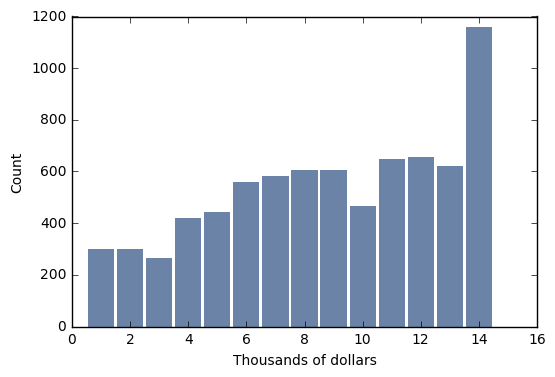

In [46]:
hist = thinkstats2.Hist(resp.totincr)
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Thousands of dollars', ylabel='Count')

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

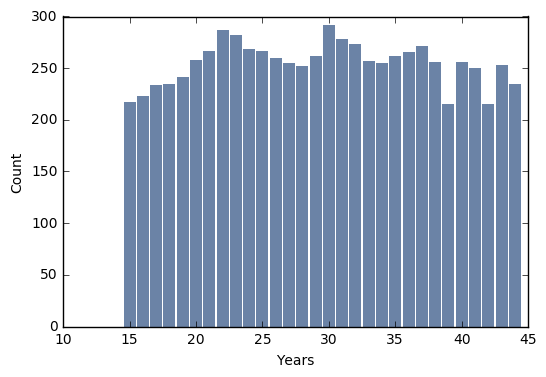

In [47]:
hist = thinkstats2.Hist(resp.age_r)
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Years', ylabel='Count')

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

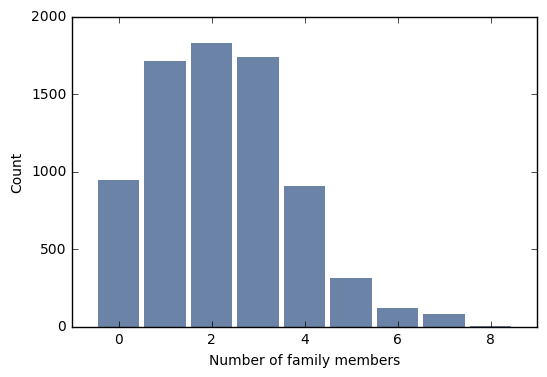

In [48]:
hist = thinkstats2.Hist(resp.numfmhh)
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Number of family members', ylabel='Count')

Make a histogram of <tt>parity</tt>, the number of children borne by the respondent.  How would you describe this distribution?

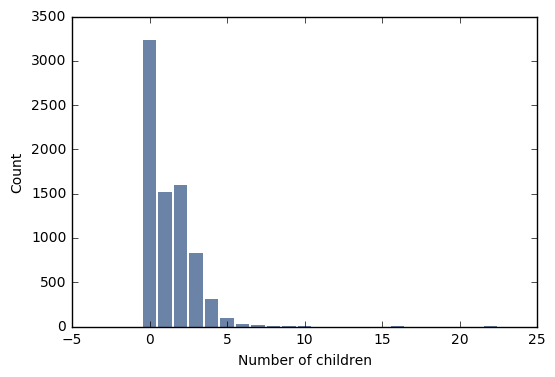

In [49]:
hist = thinkstats2.Hist(resp.parity)
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Number of children', ylabel='Count')

*This distribution looks like it has a mode at 0 from which it decays exponentially, forming a long tail to the right.*

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [52]:
for babies, freq in hist.Largest(10):
    print(babies, freq)

22 1
16 1
10 3
9 2
8 8
7 15
6 29
5 95
4 309
3 828


Let's investigate whether people with higher income have higher parity.  Keep in mind that in this study, we are observing different people at different times during their lives, so this data is not the best choice for answering this question.  But for now let's take it at face value.

Use <tt>totincr</tt> to select the respondents with the highest income (level 14).  Plot the histogram of <tt>parity</tt> for just the high income respondents.

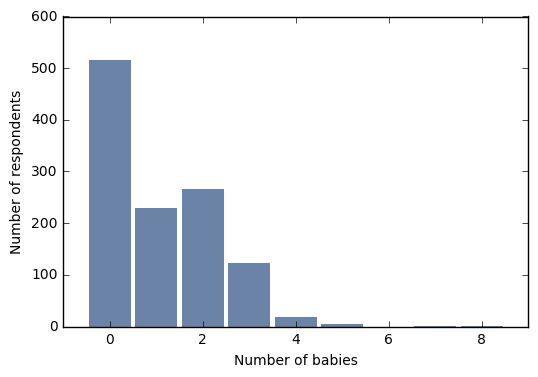

In [82]:
income = resp.totincr
parity_income = resp.parity[income == 14]
parity_hist = thinkstats2.Hist(parity_income)
thinkplot.Hist(parity_hist)
thinkplot.Config(xlabel='Number of babies', ylabel='Number of respondents')

Find the largest parities for high income respondents.

In [87]:
for babies, freq in parity_hist.Largest(3):
    print(babies, freq)

8 1
7 1
5 5


Compare the mean <tt>parity</tt> for high income respondents and others.

In [89]:
highinc_parity = parity_income
otherinc_parity = resp.parity[resp.totincr != 14]
high_mean = highinc_parity.mean()
other_mean = otherinc_parity.mean()
high_mean - other_mean

-0.17371374470099532

Compute the Cohen effect size for this difference.  How does it compare with the difference in pregnancy length for first babies and others?

In [92]:
esd_parity = CohenEffectSize(highinc_parity, otherinc_parity)
esd_parity

-0.12511855314660611

In [93]:
esd_prglngth - esd_parity

0.15399759780105599